80


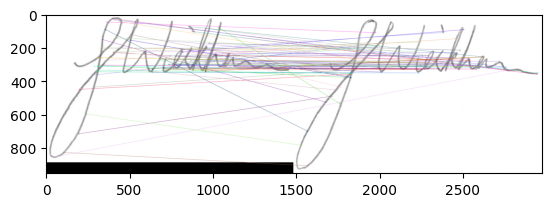

(<matplotlib.image.AxesImage at 0x16bfce06500>, None)

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Wczytaj obrazy
img1 = cv2.imread('podpis1.png',0)  # Obraz oryginalny
img2 = cv2.imread('podpis2.png',0)  # Obraz do porównania

# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
print(len(good))
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()
